In [1]:
import pandas as pd

In [2]:
klout = pd.read_csv('Klout_scores.csv', header=None, names = ['Values'])

In [3]:
klout

,Values
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690
...,...
1043,28.544280
1044,16.647022
1045,40.078943
1046,51.085002


In [47]:
klout_list = klout['Values'].tolist()
klout_list[:10]

[25.10417915,
 60.9087471,
 23.22223768,
 51.55349118,
 22.62969025,
 53.33809913,
 22.36088208,
 26.51507812,
 52.73731623,
 40.23515157]

In [48]:
def mean(l):
    m = sum(l)/len(l)
    return m

In [49]:
mean(klout_list)

37.719054832538156

In [50]:
def variance(l):
    m = sum(l)/len(l)
    normalized = [(i - m) for i in l]
    normalized_square = [(i)**2 for i in normalized]
    v = sum(normalized_square)/len(normalized_square)
    return v

In [51]:
def std_dev(l):
    v = variance(l)
    std_dev = v**(1/2)
    return std_dev

In [52]:
std_dev(klout_list)

16.036658421715316

In [53]:
import matplotlib.pyplot as plt

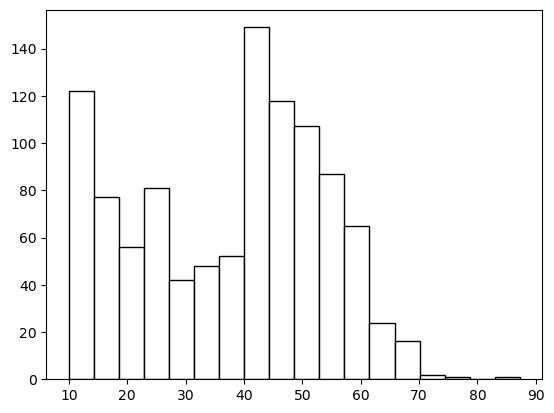

In [54]:
plt.hist(klout_list, bins=18, color='white', edgecolor='black');

Standard deviation of a klout sample of 35 units

In [55]:
def std_dev_of_k_units_sample(l,k):
    std_dev_pop = std_dev(l)
    std_dev_sample = std_dev_pop/((k)**(1/2))
    return std_dev_sample

In [56]:
std_dev_of_k_units_sample(klout_list,35)

2.710690019348119

In [57]:
def z_score(l,k,i):
    mean_pop = mean(l)
    std_dev_sample = std_dev_of_k_units_sample(l,k)
    return (i - mean_pop)/std_dev_sample

In [58]:
l = klout_list
k = 35
i = 40

In [59]:
z_score(l,k,i)

0.841462930538394

The z-score represents how many standard deviations a value (in this case, 40) is away from the mean of the dataset

In [60]:
37.719054832538156 + 2.710690019348119 * 0.841462930538394

40.0

Probability of randomly drawing a sample of size 35 with a mean of at least 40

In [61]:
z_score_of_40 = 0.841462930538394
prob_z_score = 0.7995
prob_at_least_40 = 1 - prob_z_score
print(prob_at_least_40)

0.2005


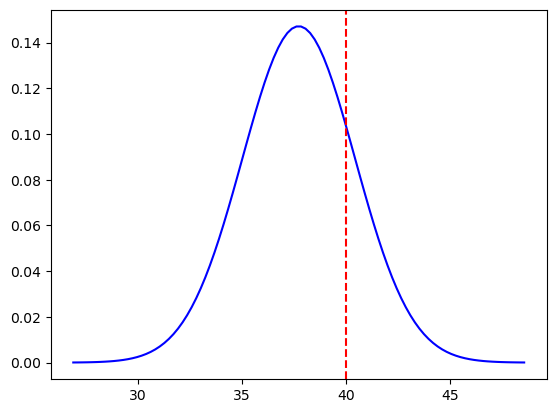

In [62]:
import numpy as np
from scipy.stats import norm

mean_sample = mean(l)
std_error = std_dev_of_k_units_sample(l,k)

x = np.linspace(mean_sample - 4*std_error, mean_sample + 4*std_error, 100)

pdf = norm.pdf(x, mean_sample, std_error)

plt.plot(x, pdf, color='blue')
plt.axvline(i, color='red', linestyle='--')

plt.show()

Probability of randomly drawing a sample of size 250 with a mean of at least 40

In [63]:
l = klout_list
k = 250
i = 40

In [64]:
std_dev_of_k_units_sample(l,k)

1.014247333414829

In [65]:
z_score(l,k,i)

2.2489042783895923

In [66]:
prob_z_score = 0.9875
prob_at_least_40 = 1 - prob_z_score
print(prob_at_least_40)

0.012499999999999956


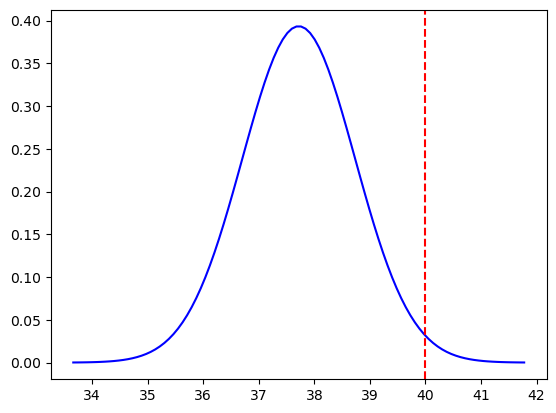

In [67]:
mean_sample = mean(l)
std_error = std_dev_of_k_units_sample(l,k)

x = np.linspace(mean_sample - 4*std_error, mean_sample + 4*std_error, 100)

pdf = norm.pdf(x, mean_sample, std_error)

plt.plot(x, pdf, color='blue')
plt.axvline(i, color='red', linestyle='--')

plt.show()

We know that in a normal distribution, approximately 68% of the data falls within one standard deviation of the mean, about 95% of the data falls within two standard deviations of the mean and approximately 99.7% of the data falls within three standard deviations of the mean.

More precisely, we know from the ZTable that about 95% of the data falls within 1.96 * standard deviations of the mean 

In [68]:
inferior_limit_interval_95 = 40 - 1.96 * std_dev_of_k_units_sample(l,k)
superior_limit_interval_95 = 40 + 1.96 * std_dev_of_k_units_sample(l,k)

print(inferior_limit_interval_95)
print(superior_limit_interval_95)

38.01207522650694
41.98792477349306


Based on the sample, we estimate with 98% confidence that the population mean falls within the interval.

In [69]:
inferior_limit_interval_98 = 40 - 2.33 * std_dev_of_k_units_sample(l,k)
superior_limit_interval_98 = 40 + 2.33 * std_dev_of_k_units_sample(l,k)

print(inferior_limit_interval_98)
print(superior_limit_interval_98)

37.63680371314345
42.36319628685655


## Engagement Ratio

In [4]:
engagement_ratio = pd.read_csv('Engagement_ratio.csv', header=None, names = ['Values'])

In [71]:
engagement_ratio_list = engagement_ratio['Values'].tolist()
engagement_ratio_list[:10]

[0.000149213,
 0.032047036,
 0.07161051,
 0.120724501,
 0.004766242,
 0.005118918,
 0.019827659,
 0.002235466,
 0.004187593,
 0.047041231]

In [72]:
l = engagement_ratio_list

In [73]:
mean(l)

0.07726584465256944

In [74]:
std_dev(l)

0.10720956480669143

Let's introduce an external factor that could affect the population mean and variance, and let's investigate it through a sample size of 20. We know that the sample mean is 0.13

In [75]:
mean_sample = 0.13

In [76]:
k = 20

In [77]:
std_dev_of_k_units_sample(l,k)

0.023972787474593114

In [78]:
inferior_limit_interval_95 = mean_sample - 1.96 * std_dev_of_k_units_sample(l,k)
superior_limit_interval_95 = mean_sample + 1.96 * std_dev_of_k_units_sample(l,k)

print(inferior_limit_interval_95)
print(superior_limit_interval_95)

0.0830133365497975
0.1769866634502025


The population mean of 0.077 falls outside the 95% confidence interval of the sample (0.083 - 0.176). Therefore, we can conclude that the external factor has significantly affected the population.

#### For Statistical distributions and interpreting P values

https://www.graphpad.com/quickcalcs/distMenu/